<hr/>

# Data Mining  [EN.553.636.02]

04/20/2018

**TA** - Cong Mu (cmu2@jhu.edu)   <br/>
**Office Hour** - Monday 9:00am ~ 11:00am

- **Data Cleaning and Preparation**: Handling Missing Data, Data Transformation, String Manipulation
- **Data Wrangling**: Join, Combine, Reshape
- **Data Visualization**: Line, Bar, Histograms, Scatter, Facet Grids
- **Q & A**

<hr/>


[Install Python](https://www.python.org/) <br/>
[Install Anaconda](https://www.continuum.io/downloads)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import re
import seaborn as sns

<h2><font color="darkblue">Data Cleaning and Preparation</font></h2>
<hr/>

### Handling Missing Data

- **NaN**

In [3]:
# Pandas uses the floating-point value NaN (Not a Number) to represent missing data
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [4]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [5]:
# The built-in Python None value is also treated as NA in object arrays
string_data[0] = None
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [6]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

- **NA handling methods**

<img src='files/7-1.png' width=1000 align=center>

- **Filtering Out Missing Data**

In [7]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [8]:
# `dropna` returns the Series with only the non-null data and index values
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [9]:
# Equivalent
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [10]:
# A little differnet with DataFrame objects
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan], [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [11]:
# By default, dropna drops any row containing a missing value
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


In [12]:
# Only drop rows that are all NA
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [13]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [14]:
# Drop columns that are all NA
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [15]:
# Another example
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.207987,NaN,NaN
1,0.594107,NaN,NaN
2,-1.479489,NaN,-0.249901
3,1.411370,NaN,-0.234685
4,0.587861,-0.257674,0.672455
5,1.008408,-0.218599,1.562671
6,-0.984508,-0.770935,-0.472807


In [16]:
# Keep rows containing a certain number of observations
df.dropna(thresh=2)

,0,1,2
2,-1.479489,NaN,-0.249901
3,1.411370,NaN,-0.234685
4,0.587861,-0.257674,0.672455
5,1.008408,-0.218599,1.562671
6,-0.984508,-0.770935,-0.472807


- **Filling In Missing Data**

In [17]:
df

,0,1,2
0,-0.207987,NaN,NaN
1,0.594107,NaN,NaN
2,-1.479489,NaN,-0.249901
3,1.411370,NaN,-0.234685
4,0.587861,-0.257674,0.672455
5,1.008408,-0.218599,1.562671
6,-0.984508,-0.770935,-0.472807


In [18]:
# Fill missing values with 0
df.fillna(0)

,0,1,2
0,-0.207987,0.000000,0.000000
1,0.594107,0.000000,0.000000
2,-1.479489,0.000000,-0.249901
3,1.411370,0.000000,-0.234685
4,0.587861,-0.257674,0.672455
5,1.008408,-0.218599,1.562671
6,-0.984508,-0.770935,-0.472807


In [19]:
# With dictionary, could fill each column with different value
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.207987,0.500000,0.000000
1,0.594107,0.500000,0.000000
2,-1.479489,0.500000,-0.249901
3,1.411370,0.500000,-0.234685
4,0.587861,-0.257674,0.672455
5,1.008408,-0.218599,1.562671
6,-0.984508,-0.770935,-0.472807


In [20]:
# `fillna` returns a new object, but we can modify the existing object in-place
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.207987,0.000000,0.000000
1,0.594107,0.000000,0.000000
2,-1.479489,0.000000,-0.249901
3,1.411370,0.000000,-0.234685
4,0.587861,-0.257674,0.672455
5,1.008408,-0.218599,1.562671
6,-0.984508,-0.770935,-0.472807


In [21]:
# Another example
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-0.580989,-1.540059,1.747696
1,-1.560503,-0.955673,-1.348833
2,-0.801466,NaN,-1.560413
3,0.933306,NaN,1.031079
4,0.872668,NaN,NaN
5,-0.377402,NaN,NaN


In [22]:
# Interpolation with forward fill
df.fillna(method='ffill')

,0,1,2
0,-0.580989,-1.540059,1.747696
1,-1.560503,-0.955673,-1.348833
2,-0.801466,-0.955673,-1.560413
3,0.933306,-0.955673,1.031079
4,0.872668,-0.955673,1.031079
5,-0.377402,-0.955673,1.031079


In [23]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.580989,-1.540059,1.747696
1,-1.560503,-0.955673,-1.348833
2,-0.801466,-0.955673,-1.560413
3,0.933306,-0.955673,1.031079
4,0.872668,NaN,1.031079
5,-0.377402,NaN,1.031079


- **`fillna` function arguments**

<img src='files/7-2.png' width=1000 align=center>

### Data Transformation

- **Removing Duplicates**

In [24]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [25]:
# `duplicated` returns a boolean Series indicating whether each row is a duplicate or not
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [26]:
# `drop_duplicates` returns a DataFrame where the `duplicated` array is False
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [27]:
# By default consider all of the columns
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [28]:
# Filter duplicates only based on the 'k1' column
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [29]:
# Keep the last observed value
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


- **Transforming Data Using a Function or Mapping**

In [30]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [31]:
# Mapping
meat_to_animal = {
      'bacon': 'pig',
      'pulled pork': 'pig',
      'pastrami': 'cow',
      'corned beef': 'cow',
      'honey ham': 'pig',
      'nova lox': 'salmon'
}

In [32]:
# 'Normalize' with lower case
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [33]:
# `map`: a convenient way to perform element-wise transformations and other data cleaning–related operations
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [34]:
# Equivalent
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

- **Replacing Values**

In [35]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [36]:
# Replace -999 with NA values
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [37]:
# Replace multiple values
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [38]:
# Use a different replacement for each value
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [39]:
# Equivalent with dictionary
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

- **Discretization and Binning**

In [40]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [41]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [42]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [43]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [44]:
# Change which side is closed
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [45]:
# Pass bin names with a list or array to the labels option
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

### String Manipulation

- **String Methods**

<img src='files/7-3.png' width=1000 align=center>

In [46]:
# Split
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [47]:
# Replace
val.replace(',', '::')

'a::b::  guido'

In [48]:
# Count
val.count(',')

2

- **Regular Expressions**

In [49]:
# '\s+': one or more whitespace characters (tabs, spaces, and newlines)
text = 'foo bar\t baz \tqux'
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [50]:
text = """Dave dave@google.com
          Steve steve@gmail.com
          Rob rob@gmail.com
          Ryan ryan@yahoo.com
       """

In [51]:
# Identifying email addresses
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern, flags=re.IGNORECASE)
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

- **Regular Expression Methods**

<img src='files/7-4.png' width=1000 align=center>

<h2><font color="darkblue">Data Wrangling</font></h2>
<hr/>

### Combining and Merging Datasets

- **Database-Style DataFrame Joins**

In [52]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [53]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [54]:
# Join on 'key' column
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [55]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


- **Different Join Types**

<img src='files/8-1.png' width=1000 align=center>

- **`merge` Function Arguments**

<img src='files/8-2.png' width=1000 align=center>

- **Concatenating Along an Axis**

In [56]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [57]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [58]:
# With Series or DataFrame
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [59]:
# By default `concat` works along axis=0
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [60]:
# Return DataFrame (axis=1 is the columns)
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


- **`concat` Function Arguments**

<img src='files/8-3.png' width=1000 align=center>

### Reshaping and Pivoting

- **Pivoting “Long” to “Wide” Format**

In [61]:
data = pd.read_csv('files/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [62]:
# Combine the year and quarter columns to create a kind of time interval type
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})

# Long format for multiple time series
ldata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [63]:
# “Long” to “Wide”
# The first two values passed are the columns to be used respectively as the row and column index
# Then finally an optional value column to fill the DataFrame
pivoted = ldata.pivot('date', 'item', 'value')
pivoted[:10]

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2
1960-06-30,0.14,2834.390,5.2
1960-09-30,2.70,2839.022,5.6
1960-12-31,1.21,2802.616,6.3
1961-03-31,-0.40,2819.264,6.8


In [64]:
# If two value columns to reshape simultaneously
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,-2.315217
1,1959-03-31,infl,0.000,-0.275730
2,1959-03-31,unemp,5.800,0.563137
3,1959-06-30,realgdp,2778.801,1.805122
4,1959-06-30,infl,2.340,-0.978283
5,1959-06-30,unemp,5.100,0.043276
6,1959-09-30,realgdp,2775.488,0.689833
7,1959-09-30,infl,2.740,-0.753845
8,1959-09-30,unemp,5.300,0.429509
9,1959-12-31,realgdp,2785.204,0.657195


In [65]:
# Omit the last argument, obtain a DataFrame with hierarchical columns
pivoted = ldata.pivot('date', 'item')
pivoted[:10]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.275730 -2.315217  0.563137
1959-06-30  2.34  2778.801   5.1 -0.978283  1.805122  0.043276
1959-09-30  2.74  2775.488   5.3 -0.753845  0.689833  0.429509
1959-12-31  0.27  2785.204   5.6 -0.473999  0.657195  1.235990
1960-03-31  2.31  2847.699   5.2 -1.990730 -0.189126 -0.355501
1960-06-30  0.14  2834.390   5.2 -1.298667 -1.516763 -0.832656
1960-09-30  2.70  2839.022   5.6 -0.012338 -0.223235  0.019856
1960-12-31  1.21  2802.616   6.3  0.465132  0.576413  0.503854
1961-03-31 -0.40  2819.264   6.8  0.584721  1.749238  1.383683
1961-06-30  1.47  2872.005   7.0 -0.560586 -0.453568 -1.202340

- **Pivoting “Wide” to “Long” Format**

In [66]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,A,B,C,key
0,1,4,7,foo
1,2,5,8,bar
2,3,6,9,baz


In [67]:
# “Wide” to “Long” 
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [68]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


<h2><font color="darkblue">Data Visualization</font></h2>
<hr/>

### Line Plot

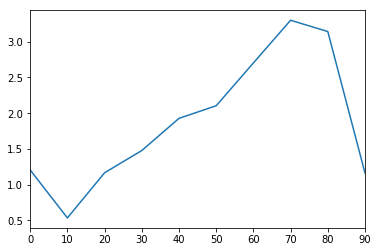

In [69]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot();

- **`Series.plot` Method Arguments**

<img src='files/9-3.png' width=1000 align=center>

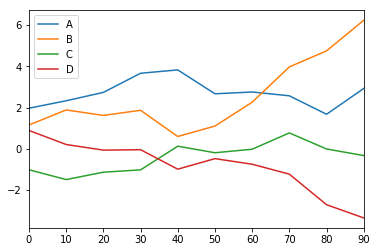

In [70]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot();

- **`DataFrame.plot` Method Arguments**

<img src='files/9-4.png' width=1000 align=center>

### Bar Plot

In [71]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

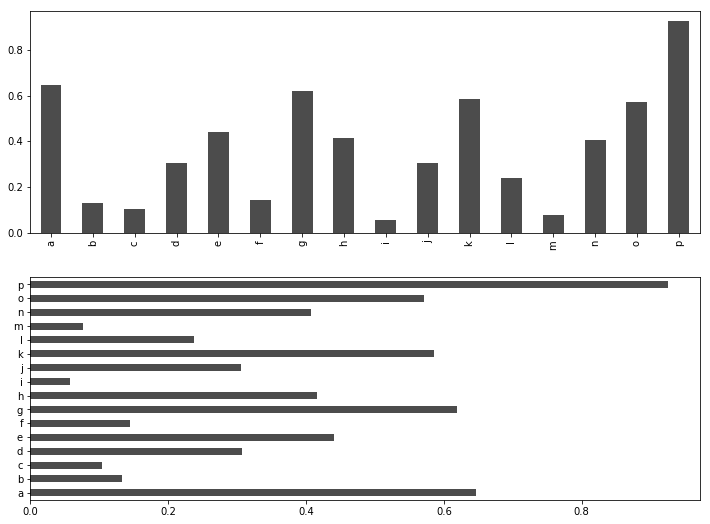

In [72]:
figure(figsize=(12,9))

subplot(211);
# vertical bar plot
data.plot.bar(color='k', alpha=0.7);

subplot(212);
# horizontal bar plot
data.plot.barh(color='k', alpha=0.7);

In [73]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.245585,0.222413,0.996571,0.708342
two,0.371933,0.527033,0.195452,0.907483
three,0.091261,0.851706,0.770151,0.913868
four,0.725296,0.221661,0.487555,0.620274
five,0.890237,0.751419,0.747900,0.630001
six,0.406272,0.183365,0.781317,0.658285


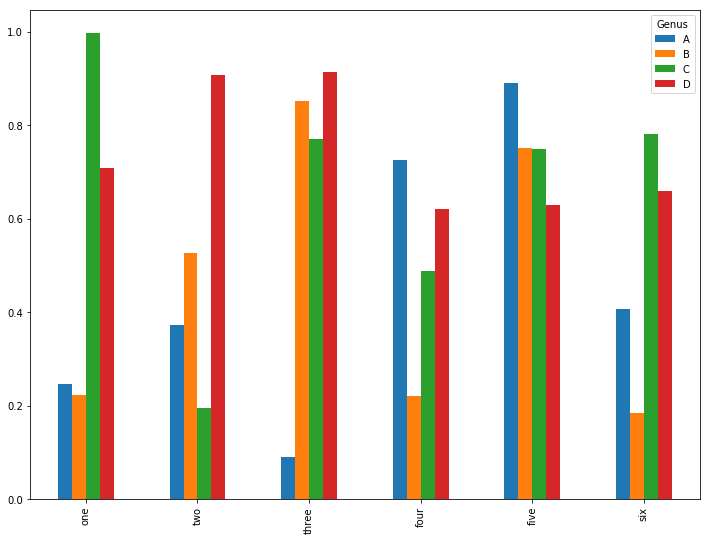

In [74]:
df.plot.bar(figsize=(12,9));

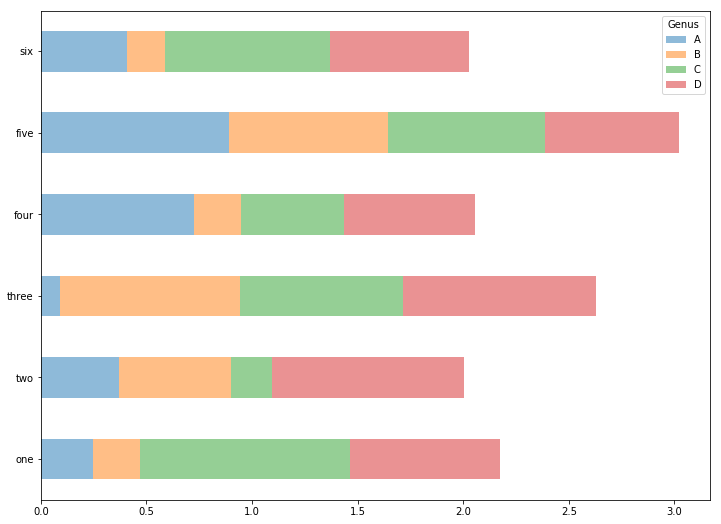

In [75]:
# Stacked bar plot
df.plot.barh(stacked=True, alpha=0.5, figsize=(12,9));

### Histogram and Density Plot

In [76]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

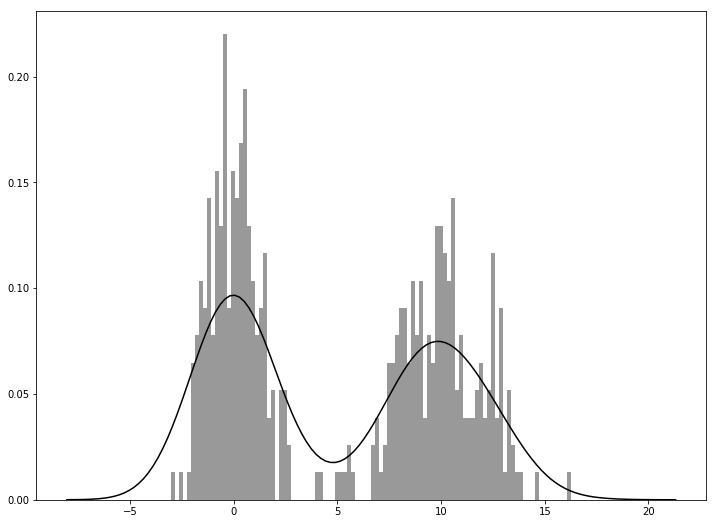

In [77]:
figure(figsize=(12,9));
sns.distplot(values, bins=100, color='k');

### Scatter or Point Plot

In [78]:
macro = pd.read_csv('files/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


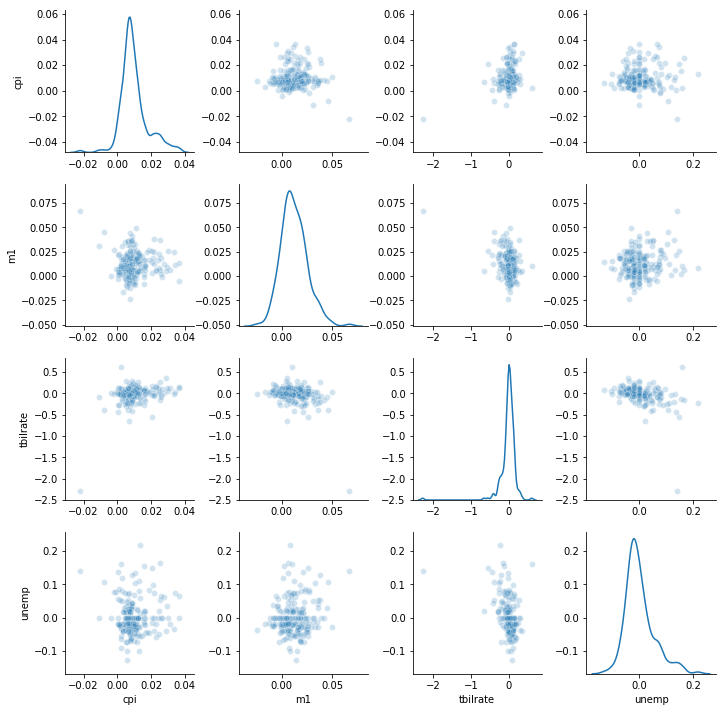

In [79]:
# pair plot (scatter plot matrix)
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2});

### Facet Grids and Categorical Data

In [80]:
tips = pd.read_csv('files/tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


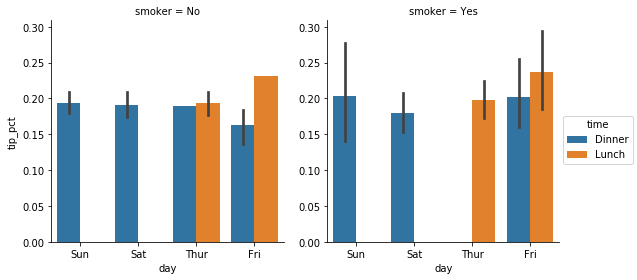

In [81]:
# Visualize data with many categorical variables
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1]);

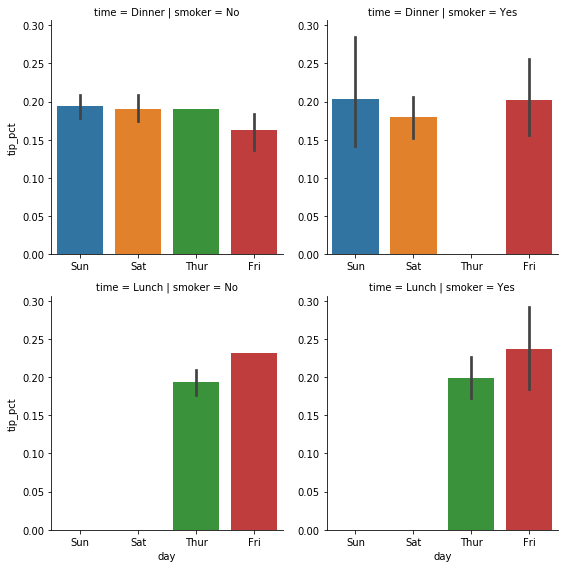

In [82]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1]);

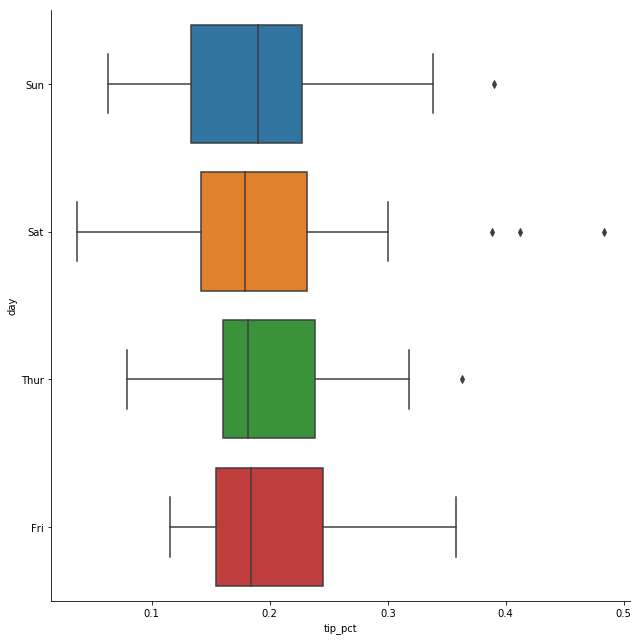

In [83]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5], size = 9);

## References

- Wes Mckinney, _Python for Data Analysis_, O'Reilly (2012).
- [scikit-learn](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

<img src="http://scikit-learn.org/stable/_static/ml_map.png" width=800 align=center>